In [1]:
# 共通事前處理
# 隱藏不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 匯入必要的函式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

# 用來顯示資料框的函式
from IPython.display import display

# 調整顯示選項
# NumPy 的浮點數表示精度
np.set_printoptions(suppress=True, precision=4)
# pandas 中的浮點數表示精度
pd.options.display.float_format = '{:.4f}'.format
# 顯示資料框中的所有項目
pd.set_option("display.max_columns",None)
# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14
# 指定圖形的預設字型
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'
# 隨機種子
random_seed = 2277

In [2]:
#載入資料、確認資料
df = pd.read_csv('stockData/stockData.csv', parse_dates=[1])
column = ['指數代碼', '日期', '開盤價', '最高價', '最低價', '收盤價', '調整後收盤價', '交易量']
df.columns = column

display(df.head())
display(df.tail())

,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
0,NYA,1965-12-31,528.6900,528.6900,528.6900,528.6900,528.6900,0.0000
1,NYA,1966-01-03,527.2100,527.2100,527.2100,527.2100,527.2100,0.0000
2,NYA,1966-01-04,527.8400,527.8400,527.8400,527.8400,527.8400,0.0000
3,NYA,1966-01-05,531.1200,531.1200,531.1200,531.1200,531.1200,0.0000
4,NYA,1966-01-06,532.0700,532.0700,532.0700,532.0700,532.0700,0.0000


,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
112452,N100,2021-05-27,1241.1200,1251.9100,1241.1200,1247.0699,1247.0699,379696400.0000
112453,N100,2021-05-28,1249.4700,1259.2100,1249.0300,1256.6000,1256.6000,160773400.0000
112454,N100,2021-05-31,1256.0800,1258.8800,1248.1400,1248.9301,1248.9301,91173700.0000
112455,N100,2021-06-01,1254.6100,1265.6600,1254.6100,1258.5800,1258.5800,155179900.0000
112456,N100,2021-06-02,1258.4900,1263.7100,1258.2400,1263.6200,1263.6200,148465000.0000


In [3]:
# 確認遺失值、欲處理資料
missing_rows = df[df.isnull().any(axis=1)]
# 查看有遺失值的列(最後5列)
display(missing_rows.tail())
# 向前填充遺失值，同df.fillnu(method='ffill')
df_filled = df.ffill()
#df_filled.isnull().sum()

,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
108316,N100,2005-03-28,NaN,NaN,NaN,NaN,NaN,NaN
108511,N100,2005-12-26,NaN,NaN,NaN,NaN,NaN,NaN
110051,N100,2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN
110643,N100,2014-05-01,NaN,NaN,NaN,NaN,NaN,NaN
112090,N100,2019-12-25,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:

df_ixic = df_filled[df_filled['指數代碼'] == 'IXIC']

display(df_ixic.head())
display(df_ixic.tail())

,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
13948,IXIC,1971-02-05,100.0000,100.0000,100.0000,100.0000,100.0000,0.0000
13949,IXIC,1971-02-08,100.8400,100.8400,100.8400,100.8400,100.8400,0.0000
13950,IXIC,1971-02-09,100.7600,100.7600,100.7600,100.7600,100.7600,0.0000
13951,IXIC,1971-02-10,100.6900,100.6900,100.6900,100.6900,100.6900,0.0000
13952,IXIC,1971-02-11,101.4500,101.4500,101.4500,101.4500,101.4500,0.0000


,指數代碼,日期,開盤價,最高價,最低價,收盤價,調整後收盤價,交易量
26633,IXIC,2021-05-24,13557.2100,13708.8496,13551.0098,13661.1699,13661.1699,3490650000.0000
26634,IXIC,2021-05-25,13721.5400,13751.1396,13631.7998,13657.1699,13657.1699,4084480000.0000
26635,IXIC,2021-05-26,13693.9404,13750.1602,13679.5898,13738.0000,13738.0000,4231140000.0000
26636,IXIC,2021-05-27,13742.5898,13776.5195,13701.6299,13736.2803,13736.2803,5057550000.0000
26637,IXIC,2021-05-28,13792.0498,13820.8701,13747.6104,13748.7402,13748.7402,4435220000.0000


In [81]:
df_ixic2 = df_ixic[['日期', '調整後收盤價']]
df_ixic2.columns = ['ds', 'y']
display(df_ixic2.head())

,ds,y
13948,1971-02-05,100.0000
13949,1971-02-08,100.8400
13950,1971-02-09,100.7600
13951,1971-02-10,100.6900
13952,1971-02-11,101.4500


In [82]:
# 假設 df_ixic2 已經是篩選出的 IXIC 數據，且已處理完 Adj Close 中的 0 值

# 1. 計算當天的日對數報酬率
# current_log_return 的 t 值 = (Adj Close_t / Adj Close_{t-1})
df_ixic2['current_log_return'] = np.log(df_ixic2['y'] / df_ixic2['y'].shift(1))

# 2. **關鍵步驟：將當日報酬率滯後一天**
# lagged_return 的 t 值，儲存的是 t-1 日的報酬率
df_ixic2['lagged_return'] = df_ixic2['current_log_return'].shift(1)

# 3. 處理 NaN：丟棄無法計算報酬率和滯後報酬率的數據點
# 通常是前兩筆數據會是 NaN
df_ixic2 = df_ixic2.dropna(subset=['lagged_return'])

print("lagged_return 欄位已成功創建並清理 NaN。")

lagged_return 欄位已成功創建並清理 NaN。


In [83]:
train_start_date = pd.to_datetime('1990-01-01')
train_end_date = pd.to_datetime('2010-12-31')
validation_end_date = pd.to_datetime('2016-12-31')

# 把1990-01-01(含)前的資料指派給train_df2
train_df_ixic2 = df_ixic2[ (df_ixic2['ds'] >= train_start_date) & (df_ixic2['ds'] <= train_end_date)]
# 把2010-12-31(含)前的資料指派給validation_df2
validation_df_ixic2 = df_ixic2[(df_ixic2['ds'] <= validation_end_date) & (df_ixic2['ds'] > train_end_date)] #注意pd中的and要用'&'代替，且是優先運算因子
# 把2016-12-31(不含)後的資料指派給test_df2
test_df_ixic2 = df_ixic2[df_ixic2['ds'] > validation_end_date]


# 重新準備 Prophet 格式的 DataFrame (現在 lagged_return 存在了)
train_df_ixic3 = train_df_ixic2[['ds', 'y', 'lagged_return']].copy()
validation_df_ixic3 = validation_df_ixic2[['ds', 'lagged_return']].copy()
display(train_df_ixic3.head())
print("資料切分和 Prophet 資料準備完成。")


,ds,y,lagged_return
18724,1990-01-02,459.3000,0.0106
18725,1990-01-03,460.9000,0.0098
18726,1990-01-04,459.4000,0.0035
18727,1990-01-05,458.2000,-0.0033
18728,1990-01-08,458.7000,-0.0026


資料切分和 Prophet 資料準備完成。


In [93]:
from prophet import Prophet
model = Prophet(
    yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False,
    growth='linear', changepoint_prior_scale=0.05, seasonality_mode='multiplicative'
)
model.add_regressor('lagged_return')

model.fit(train_df_ixic3) # 訓練模型
print('模型已訓練完成')

17:24:06 - cmdstanpy - INFO - Chain [1] start processing
17:24:08 - cmdstanpy - INFO - Chain [1] done processing


模型已訓練完成


In [94]:
future_validation = validation_df_ixic3.copy()
pred_validation = model.predict(future_validation) # 預測模型
print("已完成驗證集預測。")

已完成驗證集預測。


In [95]:
# 評估測試集結果 (最終性能報告)
df_validation_results = validation_df_ixic2.merge(
    pred_validation[['ds', 'yhat']],
    on='ds',
    how='left'
).rename(columns={'y': 'y_true'})

display(df_validation_results.head())

,ds,y_true,current_log_return,lagged_return,yhat
0,2011-01-03,2691.5200,0.0145,-0.0038,2088.5564
1,2011-01-04,2681.2500,-0.0038,0.0145,2102.8313
2,2011-01-05,2702.2000,0.0078,-0.0038,2085.2683
3,2011-01-06,2709.8899,0.0028,0.0078,2101.6543
4,2011-01-07,2703.1699,-0.0025,0.0028,2094.2610


In [96]:
# 準備計算R2值(決定係數)、RMSE(均方值誤差)
from sklearn.metrics import mean_squared_error, r2_score
y_true = df_validation_results['y_true']
y_pred = df_validation_results['yhat']

r2score = r2_score(y_true, y_pred)
print(f'驗證集 R2_score: {r2score:.4f}')
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'驗證集 RMSE: {rmse:.4f}')

驗證集 R2_score: -4.9264
驗證集 RMSE: 2282.8339


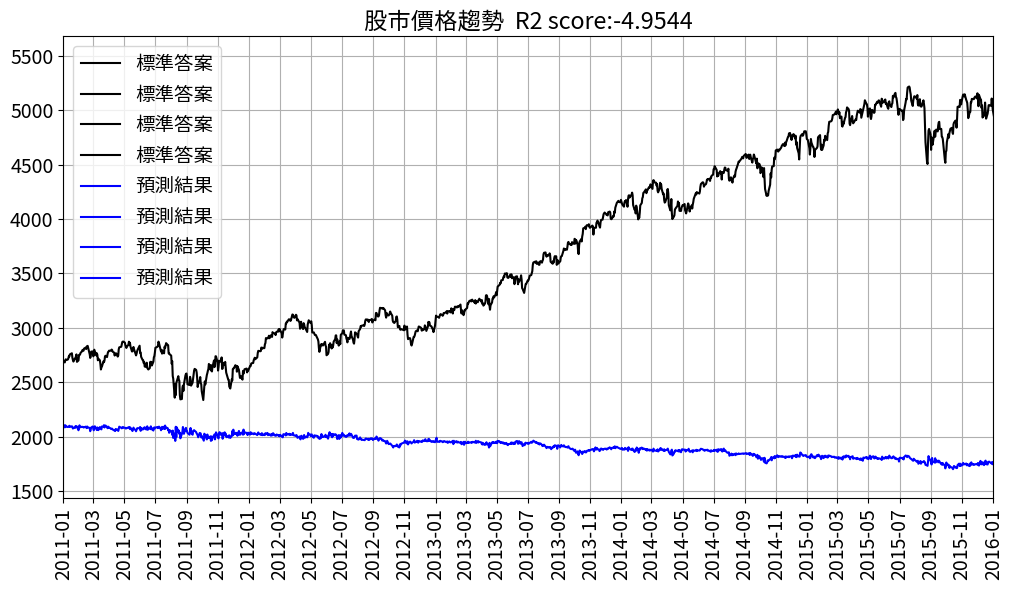

In [88]:
#繪製時間序列圖
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12,6))

#圖表內容
ax.plot(validation_df_ixic2, y_true, label='標準答案', c='k')
ax.plot(validation_df_ixic2, y_pred, label='預測結果', c='b')

#日期刻度，每2個月顯示日期
months = mdates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(months)

ax.tick_params(axis='x', rotation=90)

# 開始日與結束日
sday = pd.to_datetime('2011-01-01')
eday = pd.to_datetime('2016-01-01')
ax.set_xlim(sday, eday)

# 顯示網格等
ax.grid()
ax.legend()
ax.set_title(f'股市價格趨勢  R2 score:{r2score:.4f}')

# 輸出畫面
plt.show()